# Training a network w/ Tensorflow

In [1]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
#plt.style.use('ggplot')
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

# Creating a Neural Network

## Defining the data

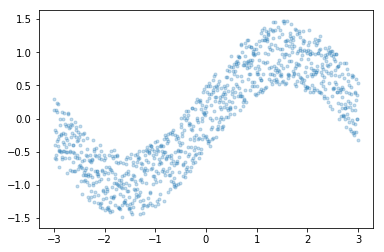

In [2]:
n_sample = 1000
xs = np.linspace(-3, 3, n_sample)
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_sample)
plt.scatter(xs, ys, alpha = 0.25, marker = '.')

## Defining Cost

In [3]:
# define the variables
X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')
sess = tf.InteractiveSession()
W = tf.Variable(tf.random_normal([1], dtype = tf.float32, stddev = 0.1), name = 'weight')
B = tf.Variable(tf.constant([0], dtype = tf.float32), name = 'bias')
Y_pred = X * W + B

# this function will measure the square distance, known as the l2-norm
def distance(p1, p2):
    return tf.sqrt( tf.abs(p1 - p2) * tf.abs(p1 - p2))

cost = tf.reduce_mean(distance(Y_pred, Y))

## Training Parameters

/Users/light/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.484224
0.43715
0.415992
0.406152
0.402708
0.401241
0.400371
0.399785
0.399563
0.399481
0.399434


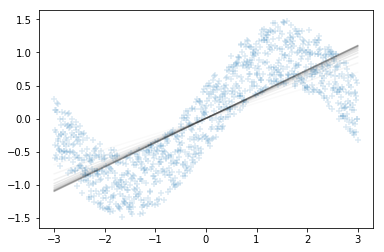

In [4]:
opt = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)
n_iterations = 500
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha = 0.15, marker = '+')
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_training_cost = 0.0
    for iter_i in range(n_iterations):
        sess.run(opt, feed_dict = {X : xs, Y : ys})
        training_cost = sess.run(cost, feed_dict = {X : xs, Y : ys})
        # every 10 iterations, output the result
        if iter_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot
            ax.plot(xs, ys_pred, 'k', alpha=iter_i / n_iterations)
            fig.show()
            plt.draw()
            print(training_cost)
        # If converge, stop training
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break

        # Keep track of the training cost
        prev_training_cost = training_cost

# Stochastic and Mini Batch Gradient Descent

In [5]:
def tain_batch(X, Y, sess, opt, batch_size = 200):
    rand_idxs = np.random.permutation(np.arange(len(xs)))
    n_batch = len(rand_idxs) // batch_size
    for batch_i in range(n_batch):
        curIdx, nextIdx = batch_i, batch_i + 1
        batch_list = rand_idxs[curIdx * batch_size : nextIdx * batch_size]
        sess.run(opt, feed_dict = {X : xs[batch_list], Y : ys[batch_list]})
    
def train(X, Y, Y_pred, n_iterations = 1000, batch_size = 200, learning_rate = 0.2):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    opt = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    ax.scatter(xs, ys, alpha = 0.15, marker = '+')
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        prev_training_cost = 0.0
        for iter_i in range(n_iterations):
            tain_batch(X, Y, sess, opt, batch_size)
            training_cost = sess.run(cost, feed_dict = {X : xs, Y : ys})
            
            if np.abs(prev_training_cost - training_cost) < 0.000001:
                break
            if iter_i % 100 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=iter_i / n_iterations)
                print(training_cost)
            prev_training_cost = training_cost
    fig.show()
    plt.draw()  

38.8151
19.0047
35.1695
18.311
17.953
15.5767
26.8421
12.7865
25.0092
17.9247


/Users/light/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


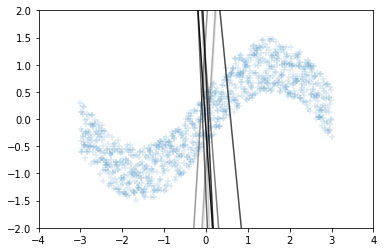

In [6]:
n_neurons = 100
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))
# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

# Instead of multiplying directly, we use tf.matmul to perform a
# matrix multiplication
h = tf.matmul(tf.expand_dims(X, 1), W) + b

# Create the operation to add every neuron's output
Y_pred = tf.reduce_sum(h, 1)

# Retrain with our new Y_pred
train(X, Y, Y_pred)

## Polynomial

3.22785
3.29636
17.8471
20.8172
48.6219
34.3753
15.3375
14.825
35.3576
6.95971


/Users/light/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


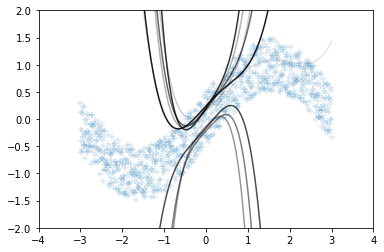

In [7]:
Y_pred = tf.Variable(tf.random_normal([1], name = 'bias'))
for pow_i in range(5):
    W = tf.Variable(tf.random_normal([1], name = 'pow_%d' % pow_i))
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W) , Y_pred)
train(X, Y, Y_pred)

## Sigmoid Function

6.34195
0.583827
0.573744
0.572574
0.572312


/Users/light/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


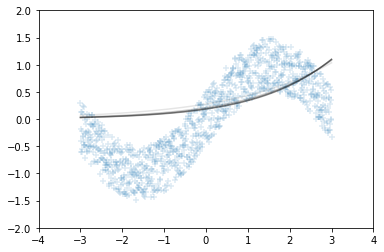

In [8]:
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name = 'W')
b = tf.Variable(tf.constant(1, dtype = tf.float32, shape = [n_neurons]), name = 'bias')
h = tf.nn.sigmoid(tf.matmul(tf.expand_dims(X, 1), W) + b, name = 'h')
Y_pred = tf.reduce_sum(h, 1)
train(X, Y, Y_pred)

## tanh Function

2.92469


/Users/light/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


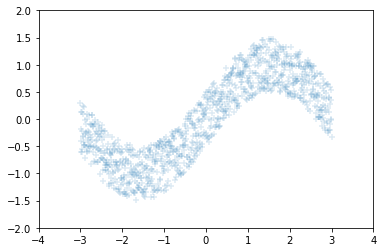

In [9]:
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name = 'w')
b = tf.Variable(tf.constant(1, dtype = tf.float32, shape = [n_neurons]), name = 'bias')
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name = 'h')
Y_pred = tf.reduce_sum(h, 1)
train(X, Y, Y_pred)

5.095
0.517301
0.518696


/Users/light/anaconda/envs/py3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


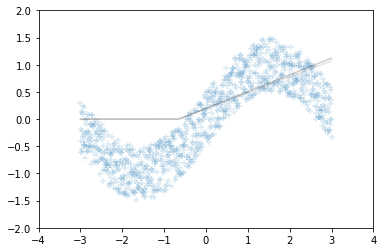

In [10]:
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name = 'w')
b = tf.Variable(tf.constant(1, dtype = tf.float32, shape = [n_neurons]), name = 'bias')
h = tf.nn.relu(tf.matmul(tf.expand_dims(X, 1), W) + b, name = 'h')
Y_pred = tf.reduce_sum(h, 1)
train(X, Y, Y_pred)

In [11]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

# Image Inpainting

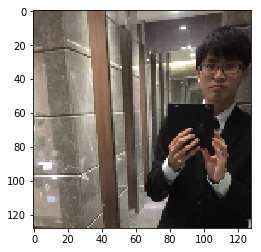

In [12]:
from skimage.data import astronaut
from scipy.misc import imresize
input_img = np.array(plt.imread('../img_preprocessing/img_align_celeba/000011.jpg'))
# img = imresize(astronaut(), (64, 64))
img = imresize(input_img, (128, 128))
plt.imshow(img)

In [13]:
xs, ys = [], []
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        xs += [row_i, col_i],
        ys += img[row_i, col_i],
xs, ys = np.array(xs), np.array(ys)
xs = (xs - np.mean(xs)) / np.std(xs)
print(xs.shape, ys.shape)
        

(16384, 2) (16384, 3)


In [14]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

## Building the Network

In [15]:
n_neurons = [2, 128, 64, 64, 64, 64, 128, 3]
cur_input = X
for layer_i in range(1, len(n_neurons)):
    cur_input = linear(
            X = cur_input,
            n_input = n_neurons[layer_i - 1],
            n_output = n_neurons[layer_i],
            activation = tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
            scope = 'Layer_%d' % layer_i)
Y_pred = cur_input

0 90.7267 0.001


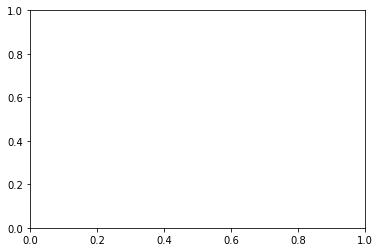

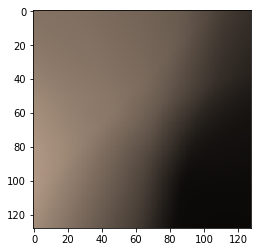

1 89.0882 0.002


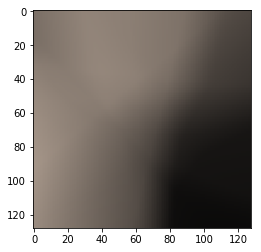

2 88.9354 0.004


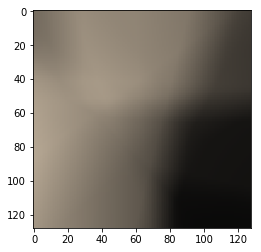

3 84.9893 0.008


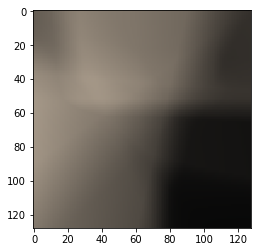

4 84.0113 0.016


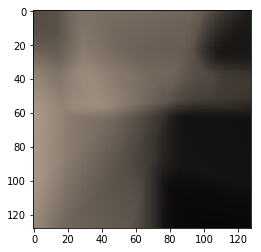

5 79.3881 0.032


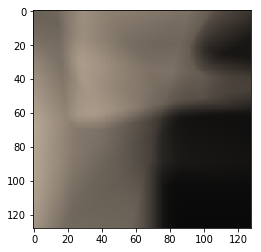

6 84.123 0.001
7 79.5551 0.002
8 74.6064 0.004


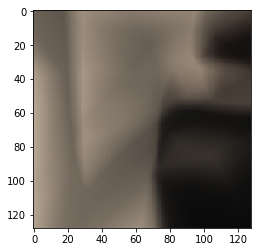

9 69.5414 0.008


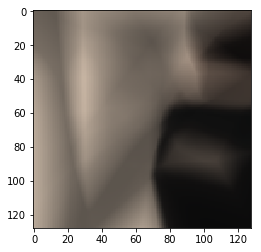

10 72.3453 0.001
11 73.0546 0.001
12 68.0205 0.002


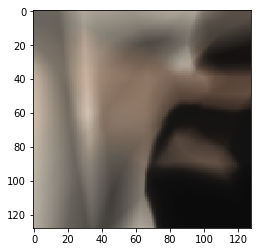

13 66.9326 0.004


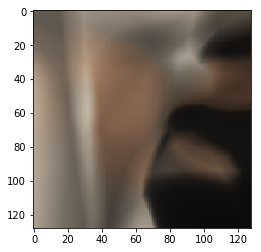

14 66.2821 0.008


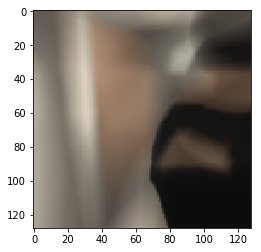

15 61.5329 0.016


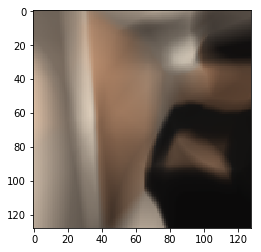

16 61.7029 0.001
17 62.5896 0.001
18 63.2409 0.001
19 59.6504 0.002


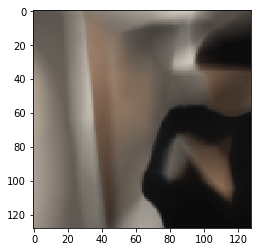

20 58.1181 0.004


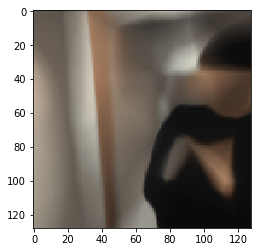

21 56.4314 0.008


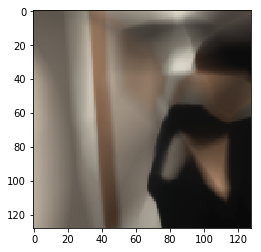

22 56.0082 0.016


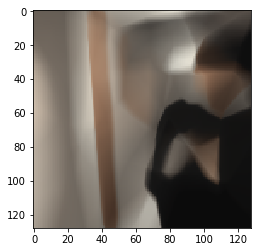

23 53.9899 0.032


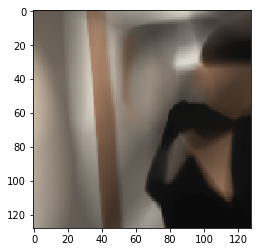

24 53.5278 0.064


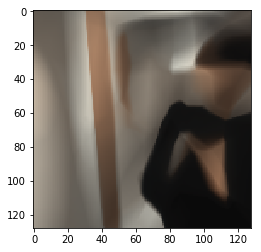

25 52.6328 0.128


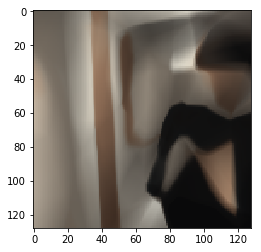

26 52.197 0.256


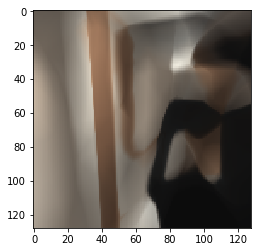

27 56.1376 0.001
28 50.9772 0.002


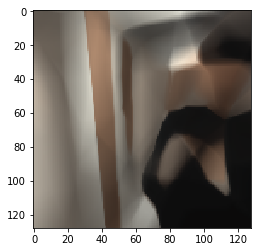

29 53.957 0.001
30 49.5877 0.002


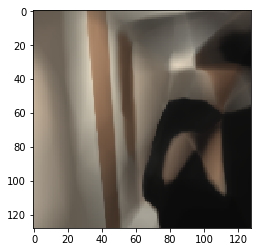

31 50.6164 0.001
32 46.9891 0.002


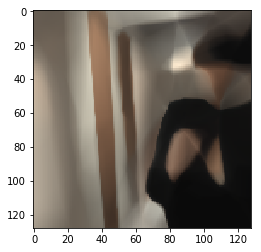

33 45.1768 0.004


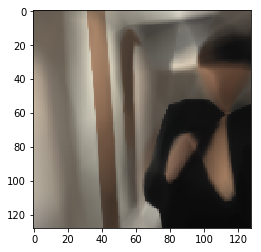

34 46.0644 0.001
35 44.1899 0.002


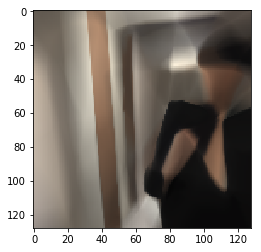

36 47.8092 0.001
37 43.8983 0.002


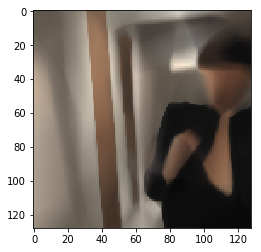

38 49.2342 0.001
39 48.1084 0.002


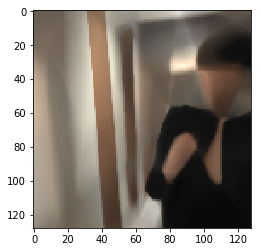

40 43.0664 0.004


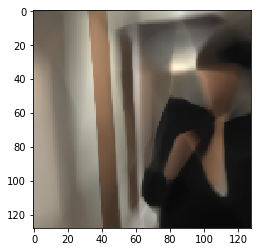

41 39.5186 0.008


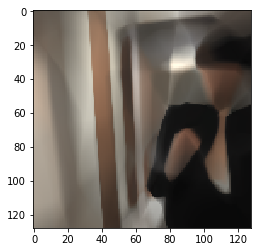

42 41.9469 0.001
43 44.296 0.001
44 43.4177 0.002
45 44.2753 0.001
46 41.2735 0.002
47 39.1542 0.004


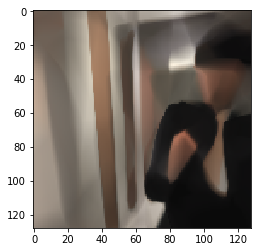

48 40.5471 0.001
49 39.6606 0.002
50 41.2079 0.001
51 43.2984 0.001
52 39.9472 0.002
53 40.4882 0.001
54 39.7054 0.002
55 39.2952 0.004
56 41.0151 0.001
57 39.7573 0.002
58 39.9396 0.001
59 39.6443 0.002


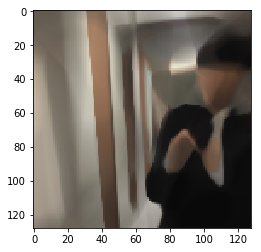

60 37.5725 0.004


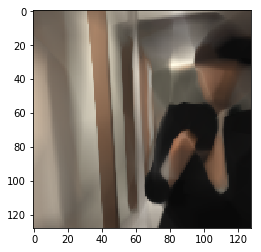

61 39.9541 0.001
62 39.4111 0.002
63 39.842 0.001
64 36.3707 0.002


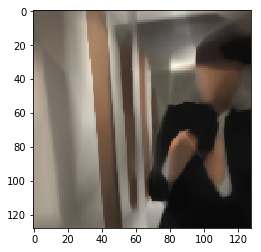

65 40.7813 0.001
66 37.9057 0.002
67 41.8968 0.001
68 40.1664 0.002
69 38.9566 0.004
70 39.3328 0.001
71 34.8272 0.002


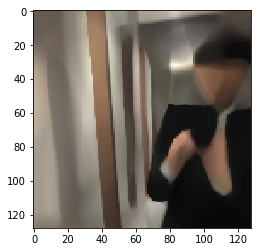

72 39.4782 0.001
73 37.7267 0.002
74 37.665 0.004
75 38.534 0.001
76 38.3267 0.002
77 34.9064 0.004
78 35.711 0.001
79 36.4925 0.001


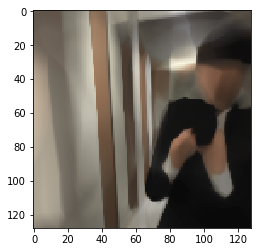

80 36.7052 0.001
81 35.0436 0.002
82 35.7144 0.001
83 35.6076 0.002
84 36.1168 0.001
85 36.9418 0.001
86 35.2985 0.002
87 34.9593 0.004
88 38.2799 0.001
89 35.9508 0.002
90 36.5632 0.001
91 32.4979 0.002


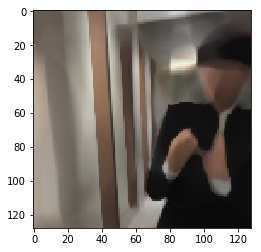

92 36.448 0.001
93 34.6175 0.002
94 34.0409 0.004
95 36.6048 0.001
96 37.4671 0.001
97 33.9866 0.002
98 34.5614 0.001
99 38.512 0.001


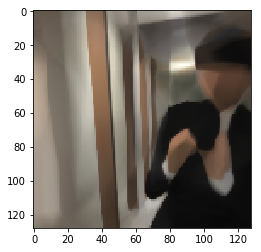

100 36.9722 0.002
101 35.9282 0.004
102 33.1445 0.008
103 35.201 0.001
104 36.2554 0.001
105 35.6668 0.002
106 34.4582 0.004
107 nan 0.001
108 nan 0.001
109 nan 0.001
110 nan 0.001
111 nan 0.001
112 nan 0.001


KeyboardInterrupt: 

In [27]:
def train_dynamic_learning_rate(X, Y, Y_pred, img, n_iterations = 500, batch_size = 150, learning_rate = 0.01):
    cost = tf.reduce_mean(tf.reduce_sum(distance(Y_pred, Y), 1))
    #opt = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 39, 64
    #opt = tf.train.AdadeltaOptimizer(learning_rate).minimize(cost) 84
    #opt = tf.train.AdagradOptimizer(learning_rate).minimize(cost) 50
    opt = tf.train.AdamOptimizer(learning_rate).minimize(cost) #35
    #opt = tf.train.MomentumOptimizer(learning_rate, learning_rate / 10).minimize(cost) #43
    #opt = tf.train.FtrlOptimizer(learning_rate).minimize(cost) #82
    #opt = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)  #44
    fig, ax = plt.subplots(1, 1)
    minCost = 1000
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        prev_training_cost = 0.0
        for iter_i in range(n_iterations):
            tain_batch(X, Y, sess, opt, batch_size)
            training_cost = sess.run(cost, feed_dict = {X : xs, Y : ys}) 

            if prev_training_cost > training_cost:
                learning_rate *= 2
            else:
                learning_rate = 0.001
            if np.abs(prev_training_cost - training_cost) < 0.0001:
                break
            print(iter_i, training_cost, learning_rate)
            if (iter_i + 1) % 20 == 0 or minCost > training_cost:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                fig, ax = plt.subplots(1, 1)
                img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
                plt.imshow(img)
                plt.show()
            minCost = min(minCost, training_cost)
            prev_training_cost = training_cost  
train_dynamic_learning_rate(X, Y, Y_pred, img)